# Mathématiques - UE 11 - projet numérique - calcul différentiel

## Judith BELLON & Louis-Justin TALLOT

### Préambule

#### Dépendances logicielles

In [1]:
# Python Standard Library
# -----------------------
import math

In [29]:
# Third-Party Libraries
# ---------------------

# Autograd & Numpy
import autograd
import autograd.numpy as np

# Pandas
import pandas as pd

# Matplotlib
%matplotlib notebook 
# permet de manipuler les figures 3D, de les faire tourner...
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [7, 7] # [width, height] (inches). 
from mpl_toolkits.mplot3d import Axes3D

# Jupyter & IPython
from IPython.display import display

#### Différentiation automatique

On définit ici deux fonctions utilitaires, `grad` et `J`, permettant de calculer simplement le gradient d'une fonction scalaire de deux variables réelles et la matrice jacobienne d'une fonction vectorielle de deux variables réelles.

In [3]:
def grad(f):
    g = autograd.grad
    def grad_f(x, y):
        return np.array([g(f, 0)(x, y), g(f, 1)(x, y)])
    return grad_f

In [4]:
def J(f):
    j = autograd.jacobian
    def J_f(x, y):
        return np.array([j(f, 0)(x, y), j(f, 1)(x, y)]).T
    return J_f

#### Exemples de référence

In [5]:
# Fonction utilitaire :

def display_contour(f, x, y, levels):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)
    fig, ax = plt.subplots()
    contour_set = plt.contour(
        X, Y, Z, colors="grey", 
        linestyles="dashed", 
        levels=levels 
    )
    ax.clabel(contour_set)
    plt.grid(True)
    plt.xlabel("$x_1$") 
    plt.ylabel("$x_2$")
    plt.gca().set_aspect("equal")

In [6]:
# fonction quadratique 

def f1(x1, x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    return 3.0 * x1 * x1 - 2.0 * x1 * x2 + 3.0 * x2 * x2 

In [7]:
# Fonction de Rosenbrock

def f2(x1, x2):
    return (x1 - 1)**2 + (x1 - x2**2)**2

In [8]:
# Fonction complexe

def f3(x, y):
    return np.sin(x + y) - np.cos(x * y) - 1 + 0.001 * (x * x + y * y) 

#### Analyse des ensembles de niveau

##### Question 1  
Soit $c \in \mathbb{R}$.
On suppose que la fonction $f:\mathbb{R}^2 \to \mathbb{R}$ est continue et vérifie
$f(x_1, x_2) \to +\infty$ quand $\|(x_1,x_2)\| \to +\infty$.
Que peut-on dire de l'ensemble de niveau $c$ de $f$ ?

##### Réponse 1
* L'ensemble de niveau *c* de $f$ est l'image réciproque de $\{c\}$, fermé de $\mathbb{R}$, par $f$, qui est continue. Cet ensemble est donc **fermé**.
* Comme $f$ est continue et $f(x_1, x_2) \to +\infty$ quand $\|(x_1,x_2)\| \to +\infty$, alors il existe $c_0 \in \mathbb{R}$ tel que pour tout $c \geq c_0$ l'ensemble de niveau $c$ de $f$ est **non vide**. 
Le plus petit tel $c_0$ est alors le minimum global de la fonction $f$ sur $\mathbb{R}^2$.



##### 

Dans la suite la fonction $f$ est supposée continûment différentiable. On suppose également que le gradient $\nabla f$ ne s'annule pas dans un voisinage du point $x_0 = (x_{10}, x_{20}) \in \mathbb{R}^2$. On pose alors
$$
p(x_1, x_2) := \frac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|} (x_1 - x_{10}) -
\frac{\partial_1 f(x_0)}{\|\nabla f(x_0)\|} (x_2 - x_{20}).
$$



##### Question 2
Comment interpréter géométriquement le terme $p(x_1,x_2)$ ?

##### Réponse 2
Nous remarquons que $p$ prend la forme d'un déterminant entre les vecteurs $\begin{pmatrix} x_1-x_{10} \\ x_2-x_{10} \end{pmatrix}$ et $\dfrac{1}{\|\nabla f(x_0)\|} \cdot \nabla f(x_0)$.

$p$ représente donc l'aire du parallélogramme formé par ces deux vecteurs; ainsi, quand on se déplace en s'éloignant de $x_0$ dans la direction du gradient, $p$ est nul, tandis qu'il est maximal (à distance fixée de $x_0$) si on se déplace de manière orthogonale au gradient, *i.e.* le long de la ligne de niveau $f(x_0)$.

De plus, nous pouvons remarquer que $p$ n'a d'intérêt que localement, l'interprétation ci-dessus n'étant plus pertinente à une trop grande distance de $x_0$; en effet les variations de $f$ ne pourront pas être déduites de $\nabla f(x_0)$.

In [9]:
# def p(f,x1,x2,x10,x20):
#     gdx0 = grad(f)(x10,x20)
#     norm = math.sqrt(gdx0[0]**2+gdx0[1]**2)
#     return (gdx0[1]/norm)*(x1-x10)-(gdx0[0]/norm)*(x2-x20)

In [10]:
# # on affiche f1 et p sur [-10,10]² :

# x = np.linspace(-10, 10, 50)
# y = np.linspace(-10, 10, 50)
# v_x, v_y = np.meshgrid(x, y)

# f = f3
# for f in [f1,f2,f3]:

#     v_z_f = f(v_x, v_y)
#     v_z_p = p(f,v_x,v_y,-10.,10.)
#     v_z_zeros = np.zeros(np.shape(v_z_p))
    
#     fig1 = plt.figure()
#     ax1 = Axes3D(fig1)
#     ax1.plot_surface(v_x, v_y, v_z_f, cmap='Blues')

#     fig2 = plt.figure()
#     ax2 = Axes3D(fig2)
#     ax2.plot_surface(v_x, v_y, v_z_p);
#     # ax2.plot_surface(v_x, v_y, v_z_zeros);


##### Question 3

Montrer que dans un voisinage ouvert de $x_0$, on peut paramétriser l'ensemble de niveau $c:=f(x_0)$ au moyen de $p(x_1,x_2),$ c'est-à-dire qu'il existe un $\varepsilon > 0$ et une fonction (continûment différentiable) $\gamma :\left]-\varepsilon,\varepsilon \right[ \to \mathbb{R}^2$ tels que dans un voisinage ouvert de $x_0,$ $f(x_1,x_2) = c$ si et seulement si $(x_1, x_2) = \gamma(t)$ où $t = p(x_1, x_2)$.

##### Réponse 3

Soit $g :\mathbb{R}^2 \times \mathbb{R}  \to \mathbb{R}^2$ définie par
$$ \forall (x_1, x_2) \in \mathbb{R}^2, t \in \mathbb{R}, \   \   g(x_1,x_2,t) = \begin{pmatrix} f(x_1, x_2)-c \\ p(x_1, x_2) - t \end{pmatrix} $$

$g$ est continûement différentiable car $f$ et $p$ le sont, et $\partial_x g$ est inversible autour de $x_0 = (x_{10},x_{20})$ 

En effet, $$ \partial_x{g}(x,t) = \begin{pmatrix} \partial_1{f}(x)   & \partial_2{f}(x) \\  \dfrac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|} &  \dfrac{-\partial_1 f(x_0)}{\|\nabla f(x_0)\|} \end{pmatrix}$$ donc
$$ \textrm{det}(\partial_x{g}(x,t)) = \dfrac{-1}{\|\nabla f(x_0)\|}(\partial_1 f(x) \cdot \partial_1 f(x_0) + \partial_2 f(x) \cdot \partial_2 f(x_0)). $$

Comme $\partial_1 f(x_0)^2 + \partial_2 f(x_0))^2 > 0 \:$, $\; \text{det}(\partial_x{g}(x,t))$ est non nul dans un voisinage de $x_0$, dans lequel $\partial_x g$ est donc inversible.

De plus, $g(x_{10}, x_{20}, t_0) = 0$ avec $t_0=p(x_{10}, x_{20})$. 

Alors, d'après le **théorème des fonctions implicites**, il existe $\left]-\varepsilon,\varepsilon \right[$ voisinage ouvert de $t_0 = 0$, $U$ voisinage ouvert de $x_0$ et une unique fonction implicite $\gamma : \left]-\varepsilon,\varepsilon \right[ \to \mathbb{R}^2$, continûement différentiable, tels que pour tous $x \in U, t \in \left]-\varepsilon,\varepsilon \right[$, 

$$ g(x,t) = 0 \Leftrightarrow x = \gamma(t)  $$
$i.e$
$$(f(x_1, x_2) = c  \:\text{ et }\:  t = p(x_1, x_2)) \Leftrightarrow (x_1,x_2)= \gamma(t) $$


##### Question 4

Montrer que pour tout $t \in \left]-\varepsilon, \varepsilon \right[$ :

  - le vecteur $\gamma'(t)$ est non nul (il fournit donc une tangente au chemin $\gamma$),

  - est orthogonal à $\nabla f(\gamma(t))$.

##### Réponse 4
Le **théorème des fonctions implicites** nous donne de plus la différentielle de $\gamma$ pour tout $t \in  \left]-\varepsilon, \varepsilon \right[$ :
$$ \gamma'(t) = -(\partial_x g(x,t))^{-1} \cdot  \partial_t{g}(x,t)    $$
Or, $ \partial_x{g}(x,t) = \begin{pmatrix} \partial_1{f}(x)   & \partial_2{f}(x) \\  \dfrac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|} &  \dfrac{-\partial_1 f(x_0)}{\|\nabla f(x_0)\|} \end{pmatrix}$, donc 
$-(\partial_x g(x,t))^{-1} = \dfrac{-1}{\text{det}(\partial_x{g}(x,t))} \begin{pmatrix} \dfrac{-\partial_1 f(x_0)}{\|\nabla f(x_0)\|}   & -\partial_2{f}(x) \\  -\dfrac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|} & \partial_1{f}(x)  \end{pmatrix}$,

et de plus $\partial_t{g}(x,t) = \begin{pmatrix} 0 \\ -1 \end{pmatrix} $ . 

Donc $\gamma'(t) = \dfrac{-1}{\text{det}(\partial_x{g}(x,t))} \begin{pmatrix} \partial_2{f}(x) \\ -\partial_1{f}(x) \end{pmatrix}.$

Alors :

 - Comme le gradient de $f$ est non nul, $\gamma'(t)$ l'est aussi. 
 - $\langle \gamma'(t) , \nabla f(x) \rangle = 0$, $i.e$ $\,\gamma'(t)$ est orthogonal à $\nabla f(x)$.

#####  

### Construction des courbes de niveau

#### Méthode de Newton

Afin de trouver des points sur des courbes de niveau, on souhaite implémenter un algorithme de résolution des équations de la forme $F(x) = 0$ où $F: \mathbb{R}^2 \to \mathbb{R}^2$, par la méthode de Newton, amorcée par un point de référence $x_0 \in \mathbb{R}^2$.

L'implémentation prendra la forme générale donnée ci-dessous. L'appel `x, y = Newton(F, x0, y0, eps, N)` devra renvoyer le couple des coordonnées d'un point $(x, y)$ qui est une solution approchée de $F(x,y)=0$ à proximité de $(x_0, y_0)$. La qualité de l'approximation produite est déterminée par le réel positif $\varepsilon > 0$, une approximation de la distance entre le point $(x,y)$ renvoyé par la fonction et la solution exacte. L'algorithme itératif s'interrompra si aucune approximation de la précision souhaitée n'a été trouvée en $N$ étapes. 

##### Question 5

L'application à laquelle nous destinons la fonction `Newton` demande-t-elle une grande précision ?
Choisir une valeur de `eps` qui semble raisonnable et justifier l'ordre de grandeur choisi.

In [11]:
N = 100
eps = 1e-8
"""
On veut une valeur suffisamment précise pour avoir un tracé propre, 
mais pas trop car on cherche seulement un tracé et non une résolution
de l'équation avec une grande précision.
De plus, la méthode de Newton est à convergence rapide ce qui
autorise de mettre une valeur relativement faible.
""";

###### Tâche 1

Implémenter la fonction `Newton` en complétant le canevas ci-dessous

In [12]:
def Newton(F, x0, y0, eps=eps, N=N):
    
    for i in range(N): 
 
        # on calcule la jacobienne de F au point x0,y0
    
        jac0 = J(F)(x0,y0)
        
        # on calcule directement x, y par une formule analogue
        # à celle de la méthode de Newton de R -> R

        x,y = np.array([x0,y0]) - np.dot(np.linalg.inv(jac0),F(x0,y0))

        if np.sqrt((x - x0)**2 + (y - y0)**2) <= eps: 
            # cela signifie qu'on a approximé à la précision voulue le point cherché
            # on retourne donc ses coordonnées 

            return x, y
        
        x0, y0 = x, y    # on prend comme nouveau point de départ le point obtenu
 
    else:  
        raise ValueError(f"no convergence in {N} steps.")
        

###### Tâche 2

Testez votre implémentation de la fonction `Newton` ! On suggère par exemple de l'utiliser pour chercher un point $(x_1, x_2)$ de la ligne de niveau $0.8$ de $f_1$ (cf. Exemples de référence) qui vérifie en outre $x_1 = x_2$ en utilisant le point initial $(0.8, 0.8)$. Puis de faire varier le point initial, la contrainte supplémentaire, etc. et de représenter graphiquement les résultats.

In [13]:
""" 
La fonction F est de R² dans R².
Elle va renvoyer:
- suivant x :  f1(x,y) - 0.8      pour obtenir la valeur de la ligne de niveau
- suivant y :      x - y          ici pour avoir la contrainte x = y.
"""
c = 0.8
x1,x2  =  Newton(lambda x,y: np.array([f1(x,y)-c,x-y]), 0.8, 0.8)
print("res =   ",x1,x2)
f1(x1,x2)

res =    0.4472135954999579 0.4472135954999579


0.8

<IPython.core.display.Javascript object>


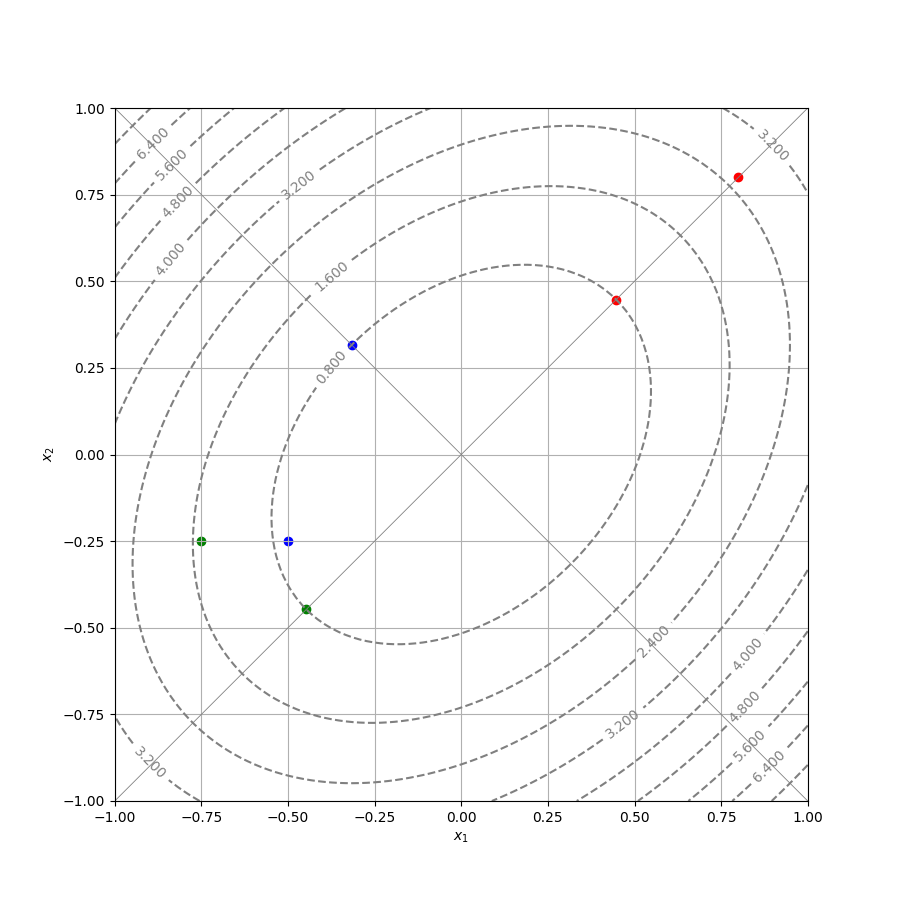

In [14]:
t = np.linspace(-1, 1, 100)
display_contour(f1, t, t, 10)
points_de_depart = [[0.8, 0.8], [-0.75,-0.25], [-0.5,-0.25]]
conditions = ["x-y", "x-y", "x+y"]
couleurs = ["r", "g", "b"]
for i in range(3):
    
    # on lance Newton avec les points de départ et les conditions choisies
    x1, x2 = Newton(lambda x,y: np.array([f1(x,y)-c, eval(conditions[i])]), points_de_depart[i][0], points_de_depart[i][1])
    
    # on affiche le point trouvé de la même couleur que le point de départ correspondant 
    plt.scatter(points_de_depart[i][0], points_de_depart[i][1], c=couleurs[i])
    plt.scatter(x1, x2, c=couleurs[i])
    

# On ajoute les droites correspondant aux conditions choisies

plt.plot(t, t, c="grey", linewidth=0.6)
plt.plot(t, -t, c="grey", linewidth=0.6);

#### Génération des points

##### Question 6 
Comment, en partant d'un point de référence $(x_0, y_0)$ tel que $f(x_0, y_0)=c$, peut-on générer avec la méthode de Newton un point $(x_1, y_1)$ également tel que $f(x_1, y_1) = c$, mais à une distance $\delta > 0$ de $(x_0, y_0)$ et qui soit "à droite" quand on est en $(x_0, y_0)$ et qu'on regarde dans la direction de $\nabla f(x_0, y_0)$ ? 


##### Réponse 6
On peut commencer par se déplacer de $\delta$ "vers la droite" de manière orthogonale au gradient, en ajoutant $\dfrac{\delta}{\|\nabla f(x_0, y_0)\|} \begin{pmatrix} \partial_2 f(x_0, y_0) \\ -\partial_1 f(x_0, y_0) \end{pmatrix} $  à $(x_0, y_0)$.
Le gradient étant orthogonal aux lignes de niveau, au premier ordre on s'est déplacé dans la bonne direction.
Il suffit ensuite d'utiliser la méthode de Newton avec ce point comme point de départ et la distance à $(x_0, y_0)$ comme contrainte supplémentaire.

Nous pouvons illustrer ce processus par le schéma suivant :

![Création de nouveau point](question6.png)

###### Tâche 3

Implémenter la fonction `level_curve` qui répète ce procédé $N-1$ fois et renvoie un tableau NumPy de taille `(2, N)` contenant les coordonnées des points correspondants, puis valider graphiquement le résultat au moyen des exemples de référence.

In [15]:
nb_points = 200
def level_curve(f, x0, y0, delta=0.1, N=nb_points, eps=eps):
    c = f(x0, y0)  # la valeur de la ligne de niveau
    
    res = np.zeros((2,N))
    res[0,0] = x0
    res[1,0] = y0
    for i in range(N-1):
        # on change de point de référence
        x0, y0 = res[:,i]
        # on calcule le gradient en ce point
        g = grad(f)(x0, y0)
        # ainsi que sa norme
        normg = np.sqrt(g[0]**2+g[1]**2)
        # que l'on utilise pour avoir le nouveau point de départ pour la méthode de Newton
        # en se plaçant "à droite" de (x0,y0) en regardant "dans le sens" du gradient
        x, y = x0 + delta * (g[1]/normg), y0 - delta * (g[0]/normg) 
        # on définit F qui va servir dans Newton()
        F = lambda x,y : np.array([f(x,y)-c , np.sqrt((x-x0)**2 + (y-y0)**2) - delta]) 
        # ici la contrainte est que la distance au point précédent doit être de delta
        # puis on calcule la position du nouveau point de la ligne de niveau
        try:
            Newton(F, x, y)
            res[:, i+1] = np.array(Newton(F, x, y))
        except Exception as exc:
            print (f"{exc}") 
        
    return res


<IPython.core.display.Javascript object>


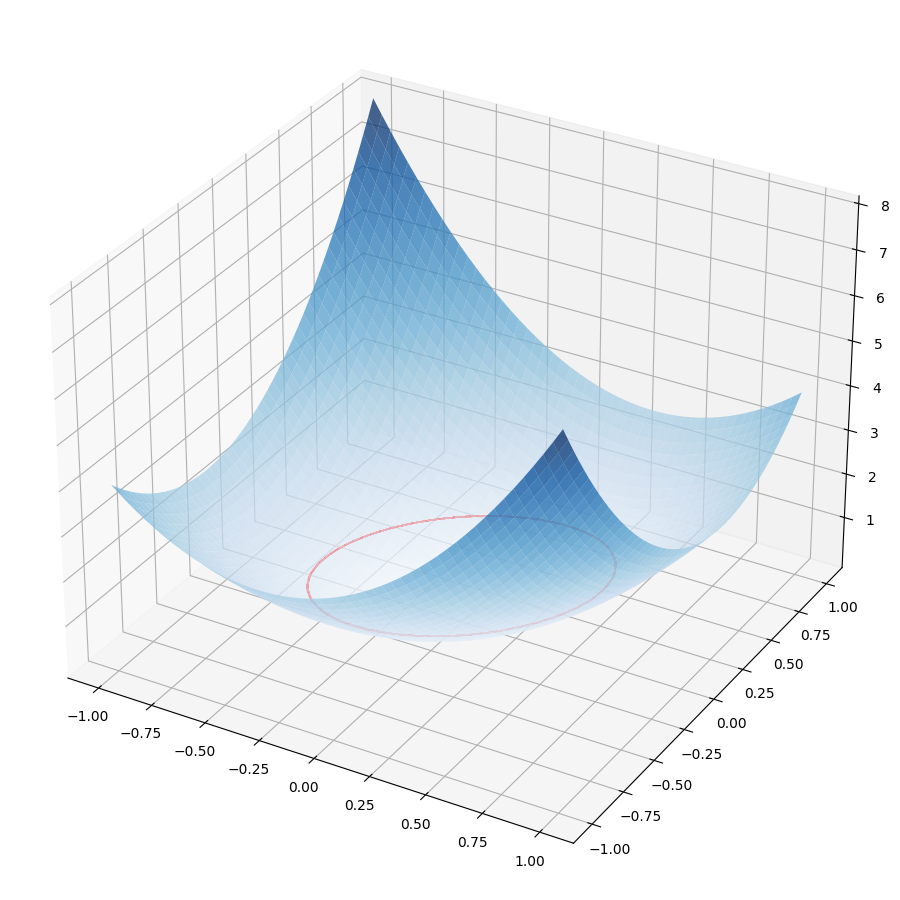

In [16]:

f = lambda x,y : f1(x,y)
c = 0.8
x0, y0 = Newton(lambda x,y: np.array([f(x,y)-c,x-y]), 0.8, 0.8)
res = level_curve(f, x0, y0)

x = np.linspace(-1, 1, 50)
y = np.linspace(-1, 1, 50)
v_x, v_y = np.meshgrid(x, y)
v_z_f = f(v_x, v_y)  

fig1 = plt.figure()
ax1 = Axes3D(fig1)
ax1.plot_surface(v_x, v_y, v_z_f, cmap='Blues', alpha = 0.75)
x_ligne = res[0,:]
y_ligne = res[1,:] 
z_ligne = (f(res[0,0], res[0,1]) ) * np.ones((nb_points,))

ax1.plot(x_ligne, y_ligne, z_ligne, color = 'r', fillstyle = 'full',linewidth = 1, linestyle = '-', in_layout = False);


<IPython.core.display.Javascript object>


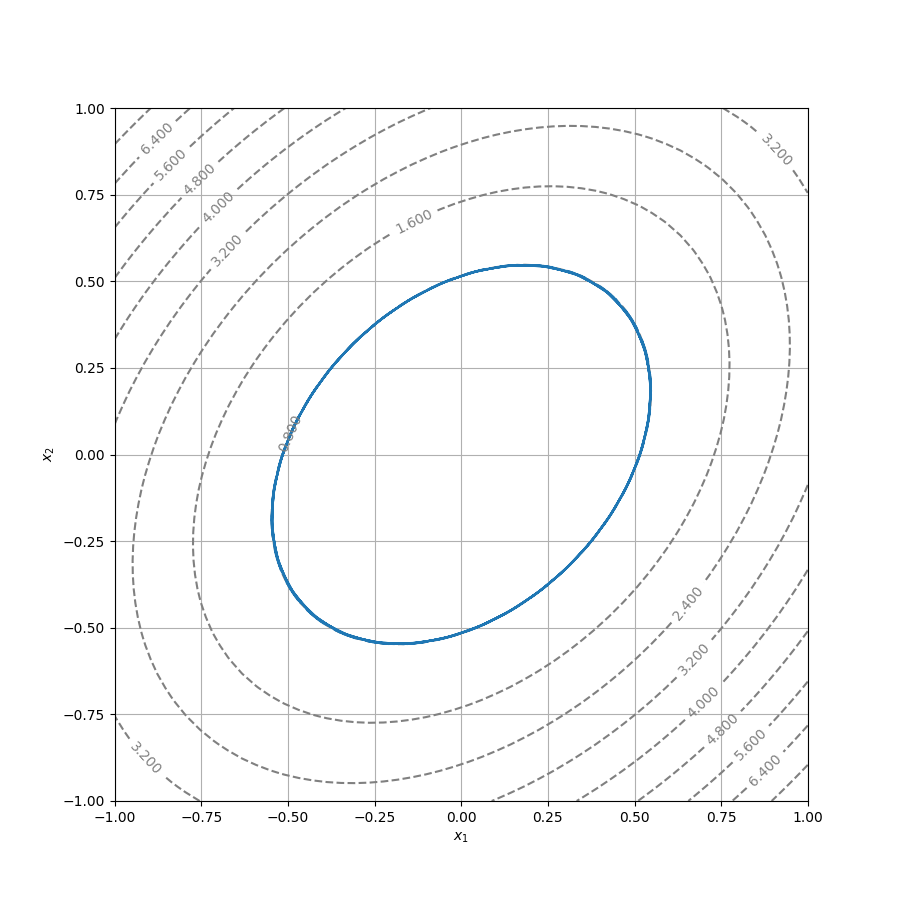

In [17]:
# autre vérification graphique, en utilisant display_contour

display_contour(f, x, y, 10)
plt.plot(x_ligne, y_ligne);

<IPython.core.display.Javascript object>


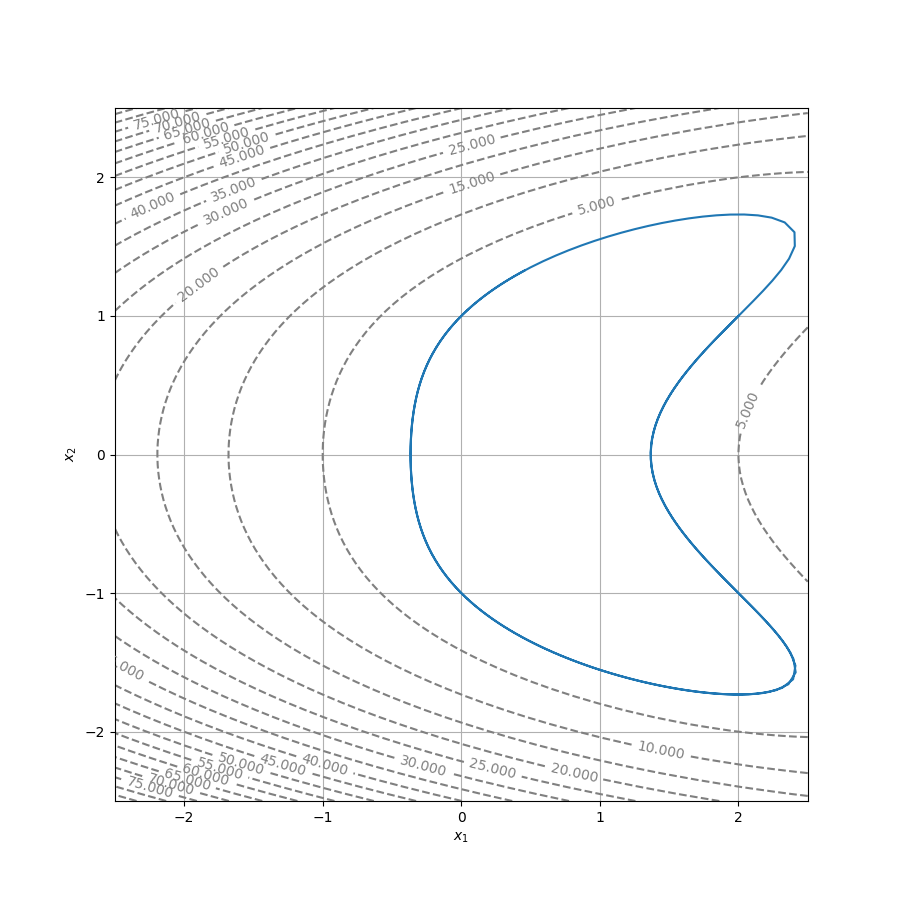

In [21]:
t = np.linspace(-2.5, 2.5, 100)

display_contour(f2, t, t, 20)

res = level_curve(f2, 2, 1, N=200)
x_ligne = res[0,:]
y_ligne = res[1,:] 

plt.plot(x_ligne, y_ligne);

<IPython.core.display.Javascript object>


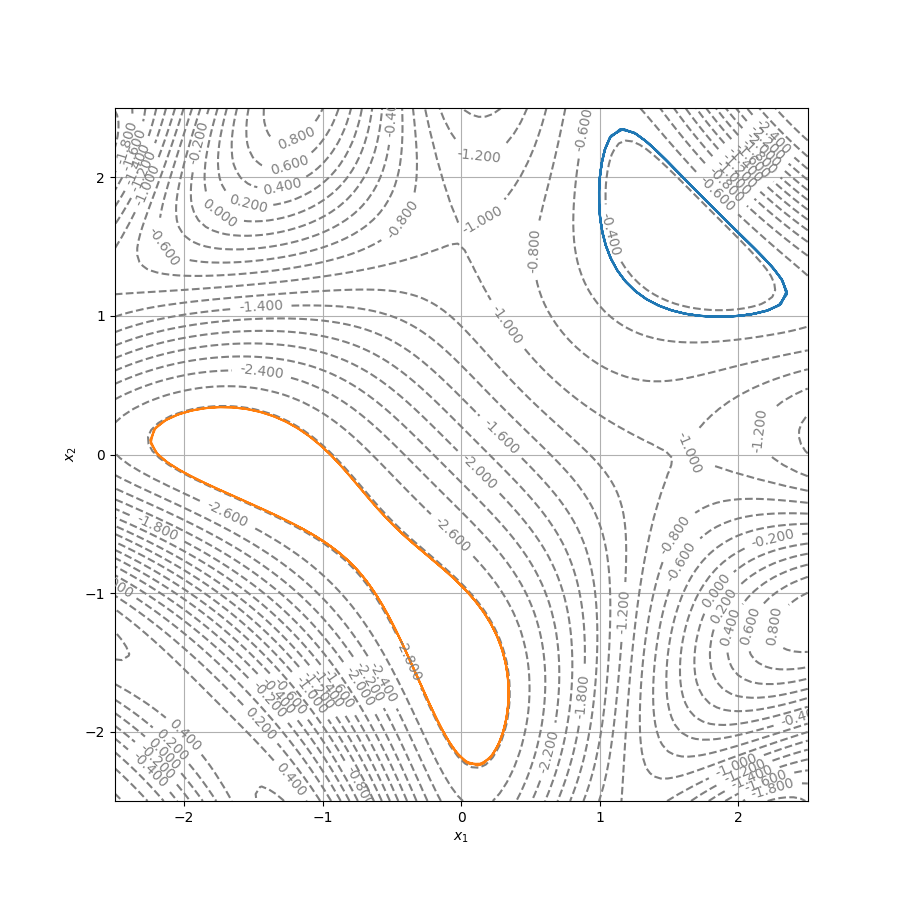

In [22]:
display_contour(f3, t, t, 20)

res = level_curve(f3, 2, 1)
x_ligne = res[0,:]
y_ligne = res[1,:] 
plt.plot(x_ligne, y_ligne)

res = level_curve(f3, -0.5, -0.5)
x_ligne = res[0,:]
y_ligne = res[1,:] 
plt.plot(x_ligne, y_ligne);

#### Bouclage et auto-intersection

L'algorithme précédent est malheureusement susceptible de faire plusieurs fois le tour d'une courbe de niveau donnée. 

##### Question 7 + Tâche 4

Proposer une nouvelle implémentation de `level_curve` qui arrête l'algorithme et renvoie les points connus quand le segment formé par les deux derniers points produits intersecte l'un des segments produits auparavant. En étant (raisonnablement) optimiste, doit-on prendre la peine de tester l'intersection du dernier segment avec tous les segments déjà produits (ce qui prend du temps ...) ou juste avec le premier ? Pour répondre à cette question, on pourra se demander si les courbes de niveau similaires à celle de la fonction de Rosenbrock passant par le point $(0.5, 0)$ (cf. Exemples de référence) -- c'est-à-dire "auto-intersectantes" -- sont fréquentes ou rares et pourquoi.

##### Réponse 
Si la courbe de niveau est "auto-intersectante", le gradient est nul à cet endroit, (et donc très faible autour) et donc notre méthode de Newton, ainsi que le choix du point de départ suivant, ne fonctionnent plus... *(soit on décide que du coup ça rentre pas dans les cas d'usage, on espère qu'on voudra jamais ces courbes de niveau, soit faut faire un truc plus subtil, par exemple dans le except pour relancer le programme plus loin, là où le gradient est suffisamment grand. Je sais pas si c'est le but de la question...)*

Ces cas sont donc déjà détectés par le `try` dans `level_curve`, et on n'a donc pas besoin de tester avec tous les segments déjà produits, mais seulement avec le premier pour savoir si on a fait le tour.


In [23]:

nb_points = 100
delta = 0.1
def level_curve2(f, x0, y0, delta= delta, N=nb_points, eps=eps):
    c = f(x0, y0) 
    
    res = np.zeros((2,N))
    res[0,0] = x0
    res[1,0] = y0
    for i in range(N-1):
        x0, y0 = res[:,i]
        g = grad(f)(x0, y0)
        normg = np.sqrt(g[0]**2+g[1]**2)
        if np.abs(normg) < 1e-16:
            print("GRADIENT NUL")
            raise ValueError("le gradient est nul")

        x, y = x0 + delta * (g[1]/normg), y0 - delta * (g[0]/normg) 
        F = lambda x,y : np.array([f(x,y)-c , np.sqrt((x-x0)**2 + (y-y0)**2) - delta]) 
        try:
            res[:, i+1] = np.array(Newton(F, x, y))
        except Exception as exc:
            print (i, f"   {exc}") 

        """TEST D'ARRÊT      à CHANGER """
        if np.sqrt((res[0,i+1] - res[0,0])**2 + (res[1,i+1] - res[1,0])**2) <= delta/2: 
            # cela signifie que l'ont est revenu très près du point de départ 
            # on a alors fait une boucle complète
            # on supprime la partie avec des zéros de res et on renvoie
            res = np.delete(res, slice(i+2, None), 1)
            print(res)
            print(i)
            print("AAAAAAAAAAAA")
            return res     

    return res


###### Tâche 5

Valider graphiquement le résultat au moyen des exemples de référence.

[[ 0.35355339  0.40902033  0.43191652  0.42676166  0.39992963  0.35632406
   0.29925907  0.2309544   0.15296573  0.0665292  -0.02705417 -0.12574929
  -0.22535698 -0.31702384 -0.38692728 -0.42501243 -0.43226133 -0.41492886
  -0.37873309 -0.32768255 -0.26445182 -0.19086351 -0.10826289 -0.01786229
   0.07876659  0.17869677  0.2756031   0.35756179]
 [ 0.35355339  0.27034631  0.17300277  0.07313572 -0.02319726 -0.11318922
  -0.19530857 -0.26834604 -0.3309381  -0.38122455 -0.41646875 -0.43257071
  -0.42372158 -0.38375675 -0.31224794 -0.21978432 -0.1200474  -0.02156093
   0.07165852  0.15764598  0.23511775  0.30282861  0.35919471  0.40194669
   0.42769275  0.43142872  0.40674747  0.34945198]]
26
AAAAAAAAAAAA


<IPython.core.display.Javascript object>


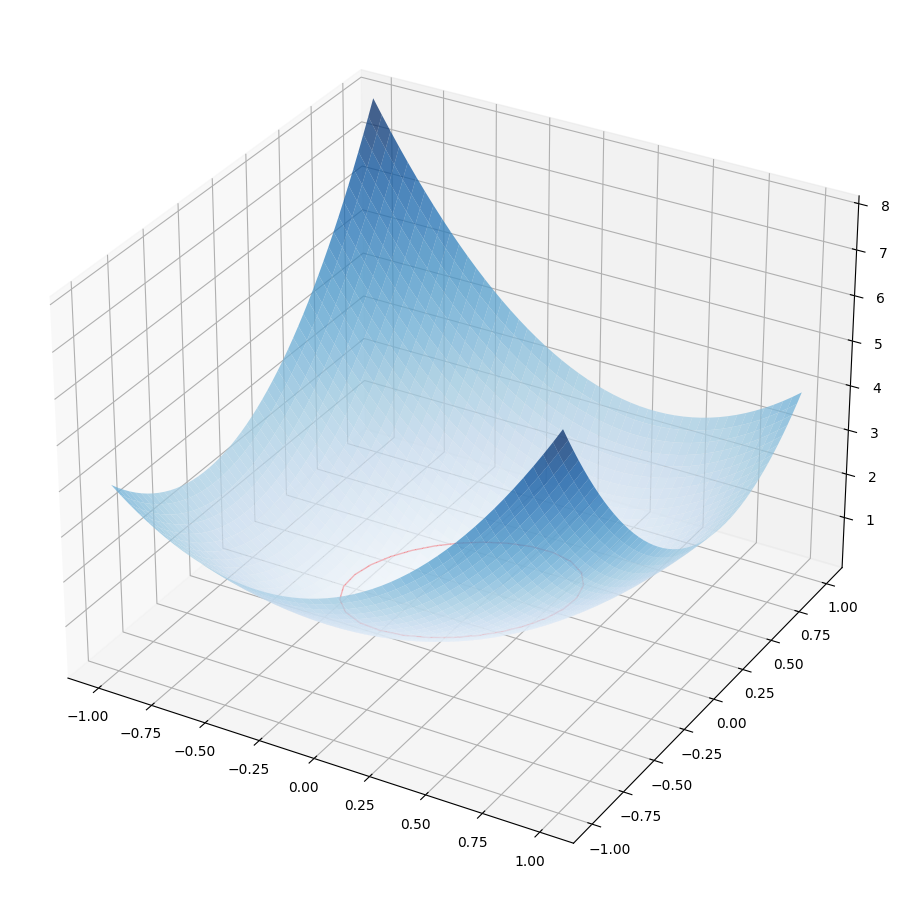

In [24]:
f = lambda x,y : f1(x,y)
c = 0.5
x0, y0 = Newton(lambda x,y: np.array([f(x,y)-c,x-y]), 0.8, 0.8)
#x0, y0 = 0.5, 0
res = level_curve2(f, x0, y0)

x = np.linspace(-1, 1, 50)
y = np.linspace(-1, 1, 50)
v_x, v_y = np.meshgrid(x, y)
v_z_f = f(v_x, v_y)  

fig1 = plt.figure()
ax1 = Axes3D(fig1)
ax1.plot_surface(v_x, v_y, v_z_f, cmap='Blues', alpha = 0.75)
x_ligne = res[0,:]
y_ligne = res[1,:] 
z_ligne = (f(res[0,0], res[0,1]) ) * np.ones((len(res[1]),))

ax1.plot(x_ligne, y_ligne, z_ligne, color = 'r', fillstyle = 'full',linewidth = 1, linestyle = '-', in_layout = False);


### Post-traitement

Pour améliorer le rendu des courbes de niveau, il est tentant de diminuer la distance $\delta$ entre deux points consécutifs. Malheureusement, dans des cas d'usage réalistes, il est fréquent que la fonction $f$ soit beaucoup plus complexe que les exemples qui nous avons considérés. Le nombre de fois où cette fonction est appelée est alors le principal facteur qui détermine le temps de calcul des lignes de niveau. On cherche donc dans cette section à améliorer la qualité visuelle des résultats sans faire exploser le nombre d'évaluation de la fonction $f$. On va chercher à résoudre ce problème en reliant les points successifs par des chemins plus "flexibles" que des segments de droites, ayant le potentiel de mieux coller aux lignes de niveau.

#### Interpolation 

##### Question 8

Soit $P_1$ et $P_2$ deux points du plan et $u_1$ et $u_2$ deux vecteurs du plan non nuls.
On cherche à produire un chemin $\gamma: [0,1] \to \mathbb{R}^2$ continûment différentiable, joignant $P_1$ et $P_2$ ($\gamma(0) = P_1$ et $\gamma(1) = P_2$), tel que $\gamma'(0)$ soit dans la même direction et le même sens que $u_1$ et $\gamma'(1)$ soit dans la même direction et le même sens que $u_2$.

On recherche une telle solution sous la forme
$\gamma(t) = (x(t), y(t))$ où 
$$
x(t) = a + bt + ct^2 \; \mbox{ et } \; y(t) = d + et + ft^2
$$
et les paramètres réels $a, b, c, d, e, f$ sont à déterminer(*).


Déterminer les coefficients $a, b, c, d, e, f$ solutions de ce problème quand ils existent.
Expliciter si nécessaire les conditions que doivent remplir $P_1$, $P_2$, $u_1$ et $u_2$ pour qu'une solution existe.


##### Réponse 8
On adopte les notations suivantes : $ P_1 = \begin{pmatrix} x_1 \\ y_1 \end{pmatrix} $, $ P_2 = \begin{pmatrix} x_2 \\ y2 \end{pmatrix} $, $\gamma(t) = \begin{pmatrix} x(t) \\ y(t) \end{pmatrix} $, 
$u_1  = \begin{pmatrix} x_{u_1} \\ y_{u_1} \end{pmatrix} $, $u_2  = \begin{pmatrix} x_{u_2} \\ y_{u_2} \end{pmatrix} $.

On veut alors : $\gamma(0) = P_1$ et $\gamma(1) = P_2$.


De plus, on veut que $\langle \gamma'(0), u_1 \rangle >0 $ et que $\langle \gamma'(1), u_2 \rangle >0 $ afin qu'ils soient dans le même "sens". Pour ce qui est de la direction, il faut alors vérifier que le produit scalaire est maximal, $i.e$ qu'il vaut le produit des normes (d'après l'inégalité de Cauchy-Schwarz dans un espace euclidien).

Néanmoins, cela revient à  dire que $ \gamma'(0)$ et  $u_1$ sont positivement colinéaires, et de même pour $\gamma'(1)$ et $u_2$.

On cherche $\gamma$ solution du problème sous la forme : $\gamma(t) = \begin{pmatrix} a + bt + ct^2 \\ d + et + ft^2 \end{pmatrix}$.

On obtient ainsi les équations suivantes : 
<!-- \left \{ \right\} -->
 $$  \begin{cases}
           a &=& x_1 \\
           d& =& y_1 \\
           a + b + c &=& x_2 \\
           d + e + f &=& y_2 \\
           b& =& k_1 \cdot x_{u_1} &\text{  avec  } k_1>0\\
           e& =&k_1 \cdot y_{u_1}\\
           b+2c& =& k_2 \cdot x_{u_2} &\text{  avec  } k_2>0\\
           e+2f& =&k_2 \cdot y_{u_2} \\
%            b \cdot x_{u_1} + e \cdot y_{u_1} > 0 \\
%            (b + 2c)\cdot x_{u_2} + (e + 2f) \cdot y_{u_2} > 0\\
%            (b \cdot x_{u_1} + e \cdot y_{u_1})^2 = (b^2 + e^2) \cdot (x_{u_1}^2 + y_{u_1}^2)\\
%            ((b + 2c)\cdot x_{u_2})^2 + ((e + 2f) \cdot y_{u_2})^2 ) = ((b+2c)^2 +(e+2f)^2)\cdot (x_{u_2}^2 + y_{u_2}^2)
           \end{cases} $$
           
On obtient un système de 8 équations à 8 inconnues, comme nous le voyons de manière plus claire :
$$  \begin{cases} %on doit avoir 16 &
           &a&&&&&&&&&&&&&&&=& x_1 \\
           &&&&&&&d&&&&&&&&& =& y_1 \\
           &a&+& b &+& c&&&&&&&&&&&=& x_2 \\
           &&&&&&&d &+& e &+& f &&&&&=& y_2 \\
           &&&b &&&&&-&&&&&  x_{u_1} \cdot k_1 &&&=& 0 &\text{  avec  } k_1>0\\
           &&&&&&&&&e&&-& &  y_{u_1} \cdot k_1 &&&= &0\\
           &&&b&+&2c& & &&&-&&&&& x_{u_2} \cdot k_2 &=&0 &\text{  avec  } k_2>0\\
           &&&&&&&&&e&+&2f& &-& &y_{u_2} \cdot k_2 &= &0 \\
%            b \cdot x_{u_1} + e \cdot y_{u_1} > 0 \\
%            (b + 2c)\cdot x_{u_2} + (e + 2f) \cdot y_{u_2} > 0\\
%            (b \cdot x_{u_1} + e \cdot y_{u_1})^2 = (b^2 + e^2) \cdot (x_{u_1}^2 + y_{u_1}^2)\\
%            ((b + 2c)\cdot x_{u_2})^2 + ((e + 2f) \cdot y_{u_2})^2 ) = ((b+2c)^2 +(e+2f)^2)\cdot (x_{u_2}^2 + y_{u_2}^2)
           \end{cases} $$
           
 
           


Ce système linéaire peut donc être représenté sous forme de matrice, avec $S$ la matrice du système $X$ les variables et $B$ le second membre : 

$$S = \begin{pmatrix}
1&0&0&0&0&0&0&0\\
0&0&0&1&0&0&0&0\\
1&1&1&0&0&0&0&0\\
0&0&0&1&1&1&0&0\\
0&1&0&0&0&0&-x_{u_1}&0\\
0&0&0&0&1&0&-y_{u_1}&0\\
0&1&2&0&0&0&0&-x_{u_2}\\
0&0&0&0&1&2&0&-y_{u_2}
\end{pmatrix} ;  X =  \begin{pmatrix}
a\\ b\\ c\\d\\e\\f\\k_1\\k_2
\end{pmatrix} \text{ et } B= \begin{pmatrix}
x_1\\y_1\\x_2\\y_2\\0\\0\\0\\0
\end{pmatrix}.$$


On a alors : $S \cdot X = B$.

Ainsi, pour savoir si le système admet des solutions, on calcule le déterminant de $S$ (en développant suivant les lignes) et on obtient que : 

$$\begin{align} \text{det}(S)&= x_{u_2} \cdot y_{u_1} - x_{u_1} \cdot y_{u_2}\\ 
                        &=\text{det}(\begin{pmatrix} x_{u_2}\\y_{u_2}\end{pmatrix},\begin{pmatrix} x_{u_1}\\y_{u_1}\end{pmatrix}) \\
                &=\text{det}(u_2,u_1).\end{align}$$
                

Ce résultat est très intéressant. En effet, il nous donne que si $u_1$ et $u_2$ sont **colinéaires**, alors le système ne possède **pas** de solutions et donc $\gamma$ n'est pas définie telle que souhaitée. Ce résultat est logique car, graphiquement, il est impossible que les tangentes à la "base" d'une fonction paramétrée par des paraboles soient parallèles. On exclut donc ces situations à l'exception d'une seule : celui où $u_1$ et $u_2$ sont également colinéaires au vecteur $\overrightarrow{P_1P_2}$. On sait alors qu'on peut relier les deux points par un segment qui se paramétrise de manière simple.

Néanmoins, dans tous ces cas, la seule solution qui s'offre à nous est de paramétrer l'arc par un **segment** $[P_1P_2]$ de la manière suivante : $\gamma(t)=  \begin{pmatrix} x_1 +(x_2-x_1)\   t  \\ y_1 + (y_2-y_1)\  t\end{pmatrix}$.

Pour les cas où des solutions existent, on les obtient simplement en **inversant** la matrice $S$.




Nous pouvons également résoudre le système à la main, afin d'avoir les solutions explicites :

$$  \begin{cases} %on doit avoir 16 &
       a&&&&&&&&&&&&&&&=& x_1 \\
       &&&&&&d&&&&&&&&& =& y_1 \\
       a&+& b &+& c&&&&&&&&&&&=& x_2 \\
       &&&&&&d &+& e &+& f &&&&&=& y_2 \\
       &&b &&&&&-&&&&&  x_{u_1} \cdot k_1 &&&=& 0 &\text{  avec  } k_1>0\\
       &&&&&&&&e&&-& &  y_{u_1} \cdot k_1 &&&= &0\\
       &&b&+&2c& & &&&-&&&&& x_{u_2} \cdot k_2 &=&0 &\text{  avec  } k_2>0\\
       &&&&&&&&&e&+&2f& &-& &y_{u_2} \cdot k_2 &= &0 \\
    \end{cases} $$
    
    
    
$$ \Leftrightarrow \begin{cases} %on doit avoir 16 &
       a&=& x_1 \\
       d& =& y_1 \\
       b &=&x_{u_1} \cdot k_1 \\
       e&=&  y_{u_1} \cdot k_1 \\
       x_1&+& x_{u_1} \cdot k_1&+& c&=& x_2 \\
       y_1 &+& y_{u_1} \cdot k_1 &+& f &=& y_2 \\
       x_{u_1} \cdot k_1&+&2c&-& x_{u_2} \cdot k_2 &=&0\\
       y_{u_1} \cdot k_1&+&2f& -&y_{u_2} \cdot k_2 &= &0 \\
\end{cases} 
\Leftrightarrow \begin{cases} % on doit avoir 16 &
       a&=& x_1 \\
       b &=&x_{u_1} \cdot k_1 \\
       c&=& x_2 &-&x_1&-& x_{u_1} \cdot k_1\\
       d& =& y_1 \\
       e&=&  y_{u_1} \cdot k_1 \\
       f &=& y_2 &-&y_1 &-& y_{u_1} \cdot k_1 \\
       x_{u_1} \cdot k_1&-& x_{u_2} \cdot k_2 &=&2x_1&-& 2x_2 &+&2 x_{u_1} \cdot k_1\\
       y_{u_1} \cdot k_1& -&y_{u_2} \cdot k_2 &= &2y_1 &-&2y_2 &+&2 y_{u_1} \cdot k_1 \\
\end{cases}
$$


A partir de là, on a les variables $a$ et $d$ explicitement; néanmoins, $b$, $c$, $e$ et $f$ sont fonctions de $k_1$. Nous devons donc résoudre le système $2\times 2$ restant, avec pour variables $k_1$ et $k_2$. 

$$\begin{cases}
       x_{u_1} \cdot k_1&+& x_{u_2} \cdot k_2 &=& 2 \: (x_2-x_1)\\
       y_{u_1} \cdot k_1&+& y_{u_2} \cdot k_2 &=& 2 \:(y_2-y_1)\\
  \end{cases}$$


Nous allons utiliser pour cela les formules de Cramer :

$$ k_1 = \dfrac{\begin{vmatrix} 2\: (x_2-x_1) & x_{u_2} \\ 2\:(y_2-y_1) & y_{u_2} \end{vmatrix} }{\begin{vmatrix} x_{u_1} & x_{u_2} \\ y_{u_1} & y_{u_2} \end{vmatrix}}  
\quad \text{et}\quad
k_2 = \dfrac{\begin{vmatrix} x_{u_1} &2\: (x_2-x_1)  \\ y_{u_1} &2\: (y_2-y_1)\end{vmatrix} }{\begin{vmatrix} x_{u_1} & x_{u_2} \\ y_{u_1} & y_{u_2} \end{vmatrix} }.  
$$

On obtient : 

$$\begin{cases}
        k_1 &=& \dfrac{2\,y_{u_2}\,(x_2-x_1) - 2\,x_{u_2}\,(y_2-y_1)}{x_{u_1} \cdot y_{u_2} - x_{u_2} \cdot y_{u_1}} \\
        k_2 &=& \dfrac{2\,x_{u_1}\,(y_2-y_1) - 2\,y_{u_2}\,(x_2-x_1)}{x_{u_1} \cdot y_{u_2} - x_{u_2} \cdot y_{u_1}} 
\end{cases}
$$

**Solution finale du système :**

$$\begin{cases}
        a&=& x_1 \\
        b &=&x_{u_1} \cdot  \dfrac{2\,y_{u_2}\,(x_2-x_1) - 2\,x_{u_2}\,(y_2-y_1)}{x_{u_1} \cdot y_{u_2} - x_{u_2} \cdot y_{u_1}} \\
        c&=& x_2 -x_1- x_{u_1} \cdot \dfrac{2\,y_{u_2}\,(x_2-x_1) - 2\,x_{u_2}\,(y_2-y_1)}{x_{u_1} \cdot y_{u_2} - x_{u_2} \cdot y_{u_1}} \\
        d& =& y_1 \\
        e&=&  y_{u_1} \cdot \dfrac{2\,y_{u_2}\,(x_2-x_1) - 2\,x_{u_2}\,(y_2-y_1)}{x_{u_1} \cdot y_{u_2} - x_{u_2} \cdot y_{u_1}} \\
        f &=& y_2 -y_1 - y_{u_1} \cdot \dfrac{2\,y_{u_2}\,(x_2-x_1) - 2\,x_{u_2}\,(y_2-y_1)}{x_{u_1} \cdot y_{u_2} - x_{u_2} \cdot y_{u_1}}  \\
        k_1 &=& \dfrac{2\,y_{u_2}\,(x_2-x_1) - 2\,x_{u_2}\,(y_2-y_1)}{x_{u_1} \cdot y_{u_2} - x_{u_2} \cdot y_{u_1}} \\
        k_2 &=& \dfrac{2\,x_{u_1}\,(y_2-y_1) - 2\,y_{u_2}\,(x_2-x_1)}{x_{u_1} \cdot y_{u_2} - x_{u_2} \cdot y_{u_1}} 
\end{cases}
$$


###### Tâche 6

Implémenter la solution sous la forme d'une fonction `gamma` dont les arguments sont `t`, `P1`, `P2`, `u1` et `u2` et qui renvoie le ou les points $\gamma(t)$ associés. Lorsqu'il n'existe pas de chemin de la forme souhaitée pour les paramètres `P1`, `P2`, `u1` et `u2`, on utilisera comment remplacement de $\gamma$ un chemin rectiligne interpolant linéairement les points $P_1$ et $P_2$.

Pour des raisons de performance, on vectorisera cette fonction par rapport à `t` : 

  - en acceptant comme argument `t` des tableaux NumPy (monodimensionels) de nombres flottants et en renvoyant alors un tableau de taille `(2, len(t))` flottants décrivant l'abscisse et l'ordonnée des `len(t)` points $\gamma(t)$ correspondant,

  - en appliquant directement opérateurs et fonctions mathématiques aux tableaux NumPy, sans utiliser de boucle `for`,
  
On validera ensuite graphiquement l'implémentation sur un exemple où l'on représentera les point $P_1$ et $P_2$, les tangentes associées et le chemin $\gamma$ correspondant.



$\rightarrow$ Nous avons fait deux fonctions, `gamma_linalg` qui utilise la matrice du système et qui l'inverse; et `gamma` qui utilise les valeurs explicites de `a`, `b`, `c`, `d`, `e`et `f` obtenues par calcul.

Par la suite, nous utiliserons `gamma` pour éviter d'avoir à faire appel à `np.linalg.inv()` à chaque fois que l'on veut construire un chemin, pour des raisons de vitesse d'exécution bien entendu. Nous laissons cependant `gamma_linalg` à des fins informatives.

In [38]:
"Une fonction utilitaire calculant le déterminant du vecteur du plan"

def det_deux_vecteurs(u, v):
    # u = |x_1   , v = |x_2
    #     |y_1         |y_2
    # det(u, v) = x_1.y_2 - x_2.y_1
    
    return float(u[0]*v[1] - u[1]*v[0])

In [102]:
"Fonction gamma_linalg à titre informatif"

def gamma_linalg(t, P1, P2, u1, u2):
    # P1, P2, u1, u2 sont des np.array([[x],[y]])
    # t est soit un float soit un np.array([.,...,.])
    
    # renvoie : le chemin et un code pour savoir si le chemin est rectiligne (0) ou non (1)
    
    if det_deux_vecteurs(u1, u2):  
        # det est alors non nul, les vecteurs ne sont pas colinéaires
        # il existe donc une unique solution
        
        S = np.array([[1,0,0,0,0,0,0,0],
                      [0,0,0,1,0,0,0,0],
                      [1,1,1,0,0,0,0,0],
                      [0,0,0,1,1,1,0,0],
                      [0,1,0,0,0,0,-float(u1[0]),0],
                      [0,0,0,0,1,0,-float(u1[1]),0],
                      [0,1,2,0,0,0,0,-float(u2[0])],
                      [0,0,0,0,1,2,0,-float(u2[1])]])
        
        B = np.array([float(P1[0]),
                      float(P1[1]),
                      float(P2[0]),
                      float(P2[1]),
                      0,0,0,0]).reshape(8,1)
        
        X = np.dot(np.linalg.inv(S),B)

        if X[6][0] < 0 or X[7][0] <0 : # alors k1<0 ou k2<0 
            #on a alors obtenu un chemin qui ne convient pas puisqu'il part "dans l'autre sens"
        
            return P1*np.ones(np.shape(t)) + (P2-P1)*t , 0 # chemin rectiligne
#         on renvoie alors gamma:
        X.resize(8)      
        a, b, c, d, e, f, k1, k2 = X
#         print(a,b,c,d,e,f)
        return np.dot(np.array([[a, b, c], [d, e, f]]),np.array([t**0, t,t**2])) , 1  # gamma, unique

    return P1*np.ones(np.shape(t)) + (P2-P1)*t , 0 # chemin rectiligne

t = np.linspace(0,1,50)



In [101]:
"Fonction gamma qui répond à la question"

def gamma(t, P1, P2, u1, u2):
    # P1, P2, u1, u2 sont des np.array([[x],[y]])
    # t est soit un float soit un np.array([.,...,.])
    
    if np.allclose(det_deux_vecteurs(u1, u2), 0.):
        # le det est nul, les vecteurs sont colinéaires
        # on n'a alors pas de solution -> chemin rectiligne
        return P1*np.ones(np.shape(t)) + (P2-P1)*t , 0 # chemin rectiligne
    
#     print(P1[0]*P2[1]-P2[0]*P1[1])
#     print(P1)
#     print(P2)
#     print(u1[0]*u2[1]-u2[0]*u1[1])

    k1 = (2*u2[1]*(P2[0]-P1[0])-2*u2[0]*(P2[1]-P1[1]))/(u1[0]*u2[1]-u2[0]*u1[1])
    k2 = (2*u1[0]*(P2[1]-P1[1])-2*u1[1]*(P2[0]-P1[0]))/(u1[0]*u2[1]-u2[0]*u1[1])
    
    if k1>0 and k2>0:
        a = float(P1[0])
        b = float(u1[0]*k1)
        c = float(P2[0]-P1[0]-u1[0]*k1)
        d = float(P1[1])
        e = float(u1[1]*k1)
        f = float(P2[1]-P1[1]-u1[1]*k1)
#         print(a,b,c,d,e,f)
        return np.dot(np.array([[a, b, c], [d, e, f]]),np.array([t**0, t,t**2])) , 1  # gamma, unique
    return P1*np.ones(np.shape(t)) + (P2-P1)*t , 0 # rectiligne
    

In [94]:
"Permet d'afficher le chemin tracé entre les points"

def afficher_gamma(t, P1, P2, u1, u2):
#     print(gamma_linalg(t, P1, P2, u1, u2)[0])
#     print(gamma(t, P1, P2, u1, u2)[0])
    gamma_linalg(t, P1, P2, u1, u2)[0]
    g = gamma(t, P1, P2, u1, u2)[0]  
    fig, ax  = plt.subplots()
    ax.plot(g[0,:], g[1,:])
    ax.scatter(P1[0], P1[1])
    ax.scatter(P2[0], P2[1])
    ax.quiver(P1[0], P1[1], u1[0], u1[1])
    ax.quiver(P2[0], P2[1], u2[0], u2[1])

<IPython.core.display.Javascript object>


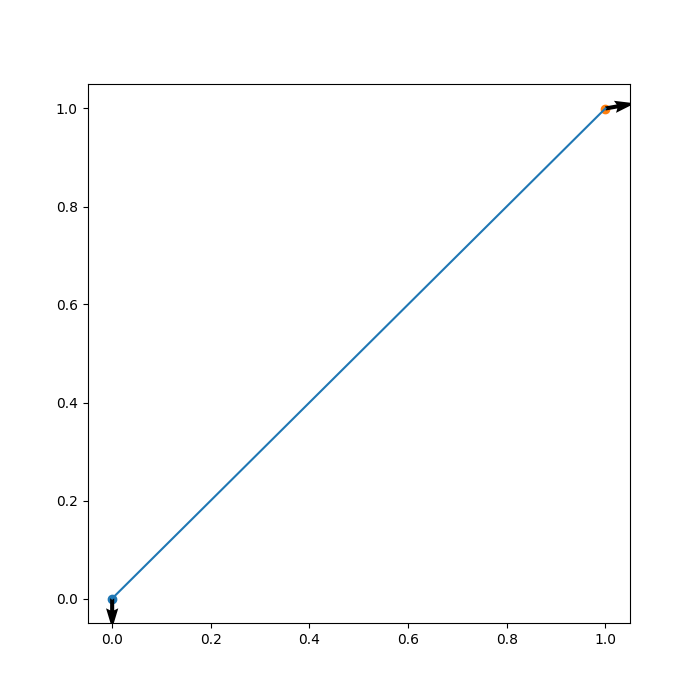

In [97]:
afficher_gamma(t, np.array([[0],[0]]), np.array([[1],[1]]), np.array([[0],[-3]]),np.array([[40],[7]]))

0.0 -2.17910447761194 3.17910447761194 0.0 3.26865671641791 -1.2686567164179101
0.0 -2.1791044776119404 3.1791044776119404 0.0 3.268656716417911 -1.2686567164179108


<IPython.core.display.Javascript object>


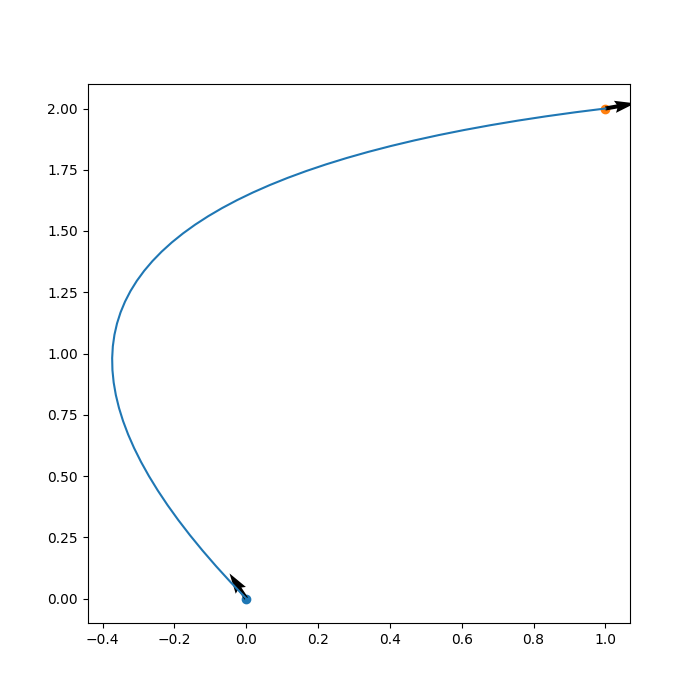

In [100]:
afficher_gamma(t, np.array([[0],[0]]), np.array([[1],[2]]), np.array([[-2],[3]]),np.array([[40],[7]]))

#### Intégration

###### Tâche 7
Intégrer le mécanisme d'interpolation dans (une nouvelle version de) la fonction `level_curve` qui accepte un nouveau paramètre entier `oversampling` (sur-échantillonnage) tel que :

  - si `oversampling == 1`, la fonction `level_curve` fonctionne comme précédemment,

  - si `oversampling > 1`, la fonction `level_curve` introduit dans son résultat `oversampling - 1` points supplémentaires obtenus par interpolations entre chaque couple de points consécutifs obtenus par la méthode de Newton.

In [ ]:

nb_points = 100
delta = 0.1

def level_curve3(f, x0, y0, delta= delta, N=nb_points, eps=eps , oversampling = 1):
    c = f(x0, y0) 
    
    res = np.zeros((2,N))
    # on va d'abord appliquer la méthode de Newton
    # puis on va interpoler avec gamma et insérer les résultats
    res[0,0] = x0
    res[1,0] = y0
    liste_des_tangentes = [] # va nous permettre de garder les vecteurs tangents en tous les points pour gamma()
    for i in range(N-x1):
        x0, y0 = res[:,i] 
        g = grad(f)(x0, y0)
        normg = np.sqrt(g[0]**2+g[1]**2)
         
        x, y = x0 + delta * (g[1]/normg), y0 - delta * (g[0]/normg) 
        liste_des_tangentes.append(np.array([[g[1]/normg], [-g[0]/normg]]))
        
        F = lambda x,y : np.array([f(x,y)-c , np.sqrt((x-x0)**2 + (y-y0)**2) - delta]) 
        try:
            res[:, i+1] = np.array(Newton(F, x, y))
        except Exception as exc:
            print (i, f"   {exc}") 
        try:
            if res[:i+1] == res[i-1]:
                print("pb")
        except:
            pass
            
            
            
        """ condition d'arrêt"""
        
    
        if np.sqrt((res[0,i+1] - res[0,0])**2 + (res[1,i+1] - res[1,0])**2) <= delta/2: 
            # cela signifie que l'ont est revenu très près du point de départ 
            # on a alors fait une boucle complète
            # on supprime la partie avec des zéros de res et on renvoie
            res = np.delete(res, slice(i+2, None), 1)
            print("ON S'ARRETE")
            break # et pas return, on n'a pas fini la fonction    

    # il manque le dernier élément à liste_des_tangentes... on le rajoute manuellement : 
    x0, y0 = res[:,-1] 
    g = grad(f)(x0, y0)
    normg = np.sqrt(g[0]**2+g[1]**2)

    liste_des_tangentes.append(np.array([g[1]/normg, - g[0]/normg]))
    
#     print(np.shape(res)[1])
#     print(len(liste_des_tangentes)) 
    
    if oversampling > 1:   # A CHANGER AVEC >1 C'EST POUR LE DEBUG
        # on va maintenant interpoler pour compléter notre courbe
        t = np.linspace(0,1,oversampling + 1) # en faisant attention d'enlever les 2 points extrèmes
        n = np.shape(res)[1]
        final = np.zeros((2,(n-1) * oversampling +1))
        for i in range(n-1):                                # attention de ne pas oublier le dernier point !!!!!
            final[:, i * oversampling] = res[:,i]
            # les points -> dans res
            P1 = np.array([[res[0,i]],[res[1,i]]])
            P2 = np.array([[res[0,i+1]],[res[1,i+1]]])
            # les vecteurs de direction ..... -> plus compliqué
            # on reprend ce qu'on a fait dans level_curve originale
            u1 = liste_des_tangentes[i]
            u2 = liste_des_tangentes[i+1]
            gam = gamma(t, P1, P2, u1, u2)
#             print(i, bool(gam[1]))
#             print(i, gam)
#             print(np.shape(gam[0]))
            final[:,i*oversampling +1 :(i+1) * oversampling] = gam[0][:, 1:oversampling  ]
        # et attention le dernier point
        final[:,-1] = res[:,-1]
        
        return final
    return res




#### Tâche 8

Valider graphiquement le résultat au moyen des exemples de référence.

In [ ]:
f = lambda x,y : f1(x,y)
c = 0.8
x0, y0 = Newton(lambda x,y: np.array([f(x,y)-c,x-y]), 0.8, 0.8)
# x0, y0 = 0.5, 0
res = level_curve3(f, x0, y0, delta = 0.1,oversampling = 2)
# print(res)
x = np.linspace(-1, 1, 50)
y = np.linspace(-1, 1, 50)
v_x, v_y = np.meshgrid(x, y)
v_z_f = f(v_x, v_y)  

fig1 = plt.figure()
ax1 = Axes3D(fig1)
ax1.plot_surface(v_x, v_y, v_z_f, cmap='Blues', alpha = 0.8)
x_ligne = res[0,:]
y_ligne = res[1,:] 
z_ligne = (f(res[0,0], res[0,1]) ) * np.ones((len(res[1]),))

# on peut aussi plot le sans oversampling pour comparer
# ax1.scatter(x_ligne, y_ligne, z_ligne, color = 'r', linewidth = 1, linestyle = '-', in_layout = False);
ax1.plot(x_ligne, y_ligne, z_ligne, color = 'r', linewidth = 1, linestyle = '-', in_layout = False);


In [ ]:
f = lambda x,y : f2(x,y)
c = 0.5
# x0, y0 = Newton(lambda x,y: np.array([f(x,y)-c,x-y]), 0.8, 0.8)
x0, y0 = 0.5, 0 
res = level_curve3(f, x0, y0, delta = 0.1,oversampling = 1, N = 500)
print(res)
x = np.linspace(0, 2.5, 50)
y = np.linspace(-2, 2, 50)
v_x, v_y = np.meshgrid(x, y)
v_z_f = f(v_x, v_y)  

fig1 = plt.figure()
ax1 = Axes3D(fig1)
# ax1.plot_surface(v_x, v_y, v_z_f, cmap='Blues', alpha = 0.8)
x_ligne = res[0,:]
y_ligne = res[1,:] 
z_ligne = (f(res[0,0], res[0,1]) ) * np.ones((len(res[1]),))
print(np.shape(res))
ax1.set_zlim(0,4)
# on peut aussi plot le sans oversampling pour comparer
# ax1.scatter(x_ligne, y_ligne, z_ligne, color = 'r', linewidth = 1, linestyle = '-', in_layout = False);
ax1.scatter(x_ligne, y_ligne, z_ligne, cmap = 'grays');
